<a href="https://colab.research.google.com/github/Vedhanthkrishna/hello_world/blob/Vedhanthkrishna-patch-1/classifieririscode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

from sklearn import datasets
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.classifier import StackingClassifier

warnings.filterwarnings('ignore')

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
lr = LogisticRegression(multi_class='auto')
gnb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)

# Define the stacking ensemble
stack = StackingClassifier(classifiers=[rf, lr, gnb, knn],
                           meta_classifier=LogisticRegression())

# Fit the base models on the training set
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)
gnb.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Fit the stacking ensemble on the training set
stack.fit(X_train, y_train)

# Evaluate performance on the test set
print('Stacking Test Accuracy: {:.3f}'.format(stack.score(X_test, y_test)))



Text(50.722222222222214, 0.5, 'True')

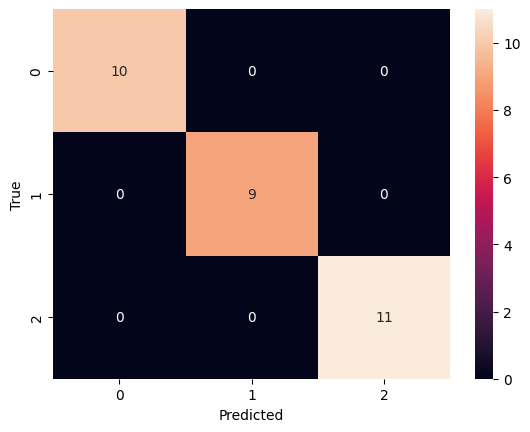

In [ ]:
# Import confusion_matrix from sklearn
from sklearn.metrics import confusion_matrix

# Get predictions on test set
y_pred = stack.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")

In [ ]:
# Load libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List of models to evaluate
models = [
    LogisticRegression(),
    LinearDiscriminantAnalysis(),
    KNeighborsClassifier(n_neighbors=5),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    SVC(kernel='linear')
]

# Dict to store accuracy score of each model
accuracy = {}

# Fit each model and calculate accuracy on test set
for model in models:
    name = type(model).__name__
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy[name] = accuracy_score(y_test, y_pred)

# Print accuracy of all models
print(accuracy)

{'LogisticRegression': 1.0, 'LinearDiscriminantAnalysis': 1.0, 'KNeighborsClassifier': 1.0, 'GaussianNB': 0.9777777777777777, 'DecisionTreeClassifier': 1.0, 'RandomForestClassifier': 1.0, 'SVC': 1.0}


In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

# Load data
iris = load_iris()
X, y = iris.data, iris.target

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Evaluate precision
print("Precision:", precision_score(y_test, y_pred, average='weighted'))

# Evaluate recall
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

# Evaluate F1 score
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

# Evaluate Cohen's kappa
print("Cohen's kappa:", cohen_kappa_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
Cohen's kappa: 1.0


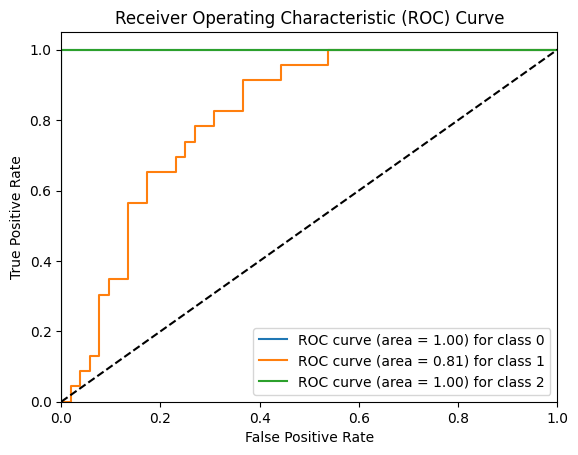

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the labels for binary classification
lb = LabelBinarizer()
y = lb.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Train a Logistic Regression model
classifier = OneVsRestClassifier(LogisticRegression(solver='liblinear'))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = y.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure()

# Plot all ROC curves
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], i))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import StackingClassifier

# Load the dataset (you can replace this with your own dataset)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Define a list of classifiers
classifiers = [
    LogisticRegression(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(),
    LGBMClassifier(),
    CatBoostClassifier(logging_level='Silent'),
    MLPClassifier(),
    GaussianProcessClassifier(),
    QuadraticDiscriminantAnalysis(),
    LinearDiscriminantAnalysis(),
]

# Dictionary to store the accuracy of each algorithm
accuracy_dict = {}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Iterate through the classifiers
for classifier in classifiers:
    classifier_name = type(classifier).__name__
    scores = cross_val_score(classifier, X, y, cv=5)  # Use cross-validation
    accuracy_dict[classifier_name] = np.mean(scores)

# Print the accuracy of each algorithm
for classifier_name, accuracy in accuracy_dict.items():
    print(f"{classifier_name}: Accuracy = {accuracy:.2f}")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



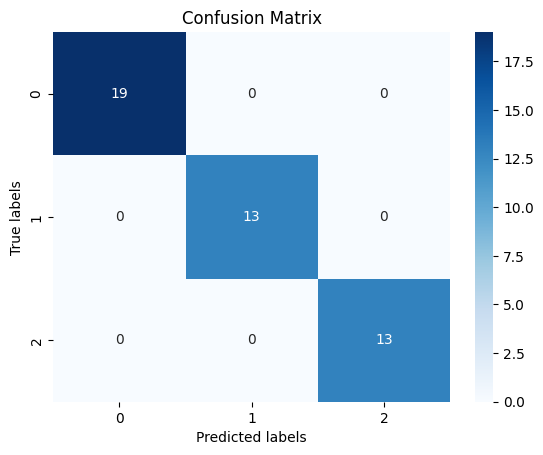

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sn

# Load data
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = SVC()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sn.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d");
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix');



# Print classification report
print(classification_report(y_test, y_pred))

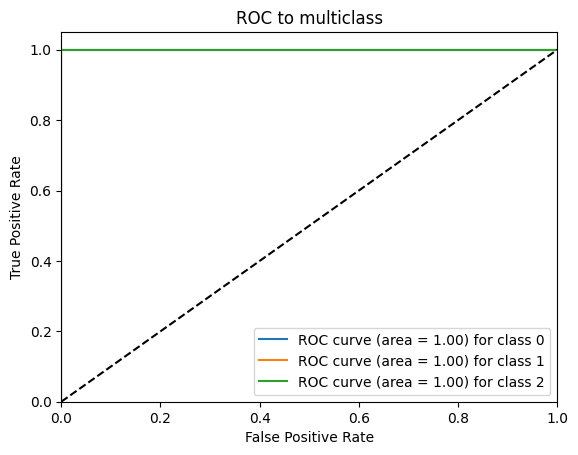

In [ ]:
from sklearn.preprocessing import LabelBinarizer

# Binarize the output
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate ROC curve for each class
for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], model.decision_function(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC for each class
for i in range(len(lb.classes_)):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], lb.classes_[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC to multiclass')
plt.legend(loc="lower right")
plt.show()

In [ ]:
pip install CatBoost

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import StackingClassifier

# Define the missing classifiers
extra_trees = ExtraTreesClassifier()
stacking_classifier = StackingClassifier(estimators=[
    ('lr', LogisticRegression()),
    ('svc', SVC()),
    ('rf', RandomForestClassifier())
], final_estimator=LogisticRegression())

# Add the missing classifiers to the list
classifiers.extend([extra_trees, stacking_classifier])

# Iterate through all classifiers
accuracy_dict = {}
for classifier in classifiers:
    classifier_name = type(classifier).__name__
    scores = cross_val_score(classifier, X, y, cv=5)  # Use cross-validation
    accuracy_dict[classifier_name] = np.mean(scores)

# Print the accuracy of all algorithms
for classifier_name, accuracy in accuracy_dict.items():
    print(f"{classifier_name}: Accuracy = {accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 89
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

LogisticRegression: Accuracy = 0.97
GaussianNB: Accuracy = 0.95
DecisionTreeClassifier: Accuracy = 0.97
RandomForestClassifier: Accuracy = 0.97
SVC: Accuracy = 0.97
KNeighborsClassifier: Accuracy = 0.97
GradientBoostingClassifier: Accuracy = 0.96
AdaBoostClassifier: Accuracy = 0.95
XGBClassifier: Accuracy = 0.95
LGBMClassifier: Accuracy = 0.95
CatBoostClassifier: Accuracy = 0.97
MLPClassifier: Accuracy = 0.97
GaussianProcessClassifier: Accuracy = 0.97
QuadraticDiscriminantAnalysis: Accuracy = 0.98
LinearDiscriminantAnalysis: Accuracy = 0.98
ExtraTreesClassifier: Accuracy = 0.95
StackingClassifier: Accuracy = 0.96


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import StackingClassifier

# Define the missing classifiers
extra_trees = ExtraTreesClassifier()
stacking_classifier = StackingClassifier(estimators=[
    ('lr', LogisticRegression()),
    ('svc', SVC()),
    ('rf', RandomForestClassifier())
], final_estimator=LogisticRegression())

# Add the missing classifiers to the list
classifiers.extend([extra_trees, stacking_classifier])

# Iterate through all classifiers
accuracy_dict = {}
for classifier in classifiers:
    classifier_name = type(classifier).__name__
    scores = cross_val_score(classifier, X, y, cv=5)  # Use cross-validation
    accuracy_dict[classifier_name] = np.mean(scores)

# Print the accuracy of all algorithms
for classifier_name, accuracy in accuracy_dict.items():
    print(f"{classifier_name}: Accuracy = {accuracy:.2f}")
